<a href="https://colab.research.google.com/github/git-hatano/pytorch_advanced/blob/main/1_image_classification/1_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[make_folders_and_data_downloads](https://github.com/YutaroOgawa/pytorch_advanced/blob/master/1_image_classification/make_folders_and_data_downloads.ipynb)

In [ ]:
import os
import urllib.request
import zipfile

In [ ]:
# フォルダ「data」が存在しない場合は作成する
data_dir = "./data/"
if not os.path.exists(data_dir):
    os.mkdir(data_dir)

In [ ]:
# ImageNetのclass_indexをダウンロードする
# Kerasで用意されているものです
# https://github.com/fchollet/deep-learning-models/blob/master/imagenet_utils.py

url = "https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json"
save_path = os.path.join(data_dir, "imagenet_class_index.json")

if not os.path.exists(save_path):
    urllib.request.urlretrieve(url, save_path)

In [ ]:
# 1.3節で使用するアリとハチの画像データをダウンロードし解凍します
# PyTorchのチュートリアルで用意されているものです
# https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html

url = "https://download.pytorch.org/tutorial/hymenoptera_data.zip"
save_path = os.path.join(data_dir, "hymenoptera_data.zip")

if not os.path.exists(save_path):
    urllib.request.urlretrieve(url, save_path)

    # ZIPファイルを読み込み
    zip = zipfile.ZipFile(save_path)
    zip.extractall(data_dir)  # ZIPを解凍
    zip.close()  # ZIPファイルをクローズ

    # ZIPファイルを消去
    os.remove(save_path)

## [1.1「学習済みVGGモデル」を使用する方法](https://github.com/YutaroOgawa/pytorch_advanced/blob/master/1_image_classification/1-1_load_vgg.ipynb)

 ImageNetで事前学習済みのVGG16モデルで、手元の画像を予測



In [ ]:
import numpy as np
import json
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

import torch
import torchvision
from torchvision import models, transforms

In [ ]:
print("Pytorch Version:", torch.__version__)
print("Torchvision Version:", torchvision.__version__)

Pytorch Version: 1.12.1+cu113
Torchvision Version: 0.13.1+cu113


In [ ]:
#modelの用意
use_pretrained = True
net = models.vgg16(pretrained=use_pretrained)
net.eval()

print(net)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [ ]:
#前処理のクラス
class BaseTransform():
    def __init__(self, resize, mean, std):
        self.base_transform = transforms.Compose([
            transforms.Resize(resize),
            transforms.CenterCrop(resize),
            transforms.ToTensor(),
            transforms.Normalize(mean, std)
        ])
    
    def __call__(self, img):
        return self.base_transform(img)

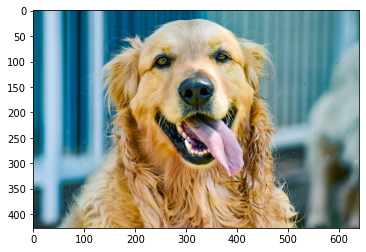

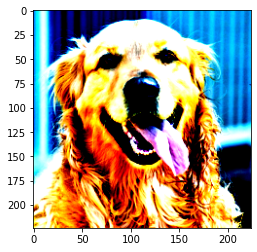

In [ ]:
#画像の読み込み
img_file_path = "/content/data/goldenretriever-3724972_640.jpg"
img = Image.open(img_file_path)

plt.imshow(img)
plt.show()

#前処理
resize = 224
mean = (0.485, 0.456, 0.406)
std = (0.229, 0.224, 0.225)

transform = BaseTransform(resize, mean, std)
img_transformed = transform(img) #[channnel, height, width]

#表示
img_transformed = img_transformed.numpy().transpose(1, 2, 0)
img_transformed = np.clip(img_transformed, 0, 1)
plt.imshow(img_transformed)
plt.show()

In [ ]:
ISLVRC_class_index = json.load(open("/content/data/imagenet_class_index.json", "r"))
ISLVRC_class_index

{'0': ['n01440764', 'tench'],
 '1': ['n01443537', 'goldfish'],
 '2': ['n01484850', 'great_white_shark'],
 '3': ['n01491361', 'tiger_shark'],
 '4': ['n01494475', 'hammerhead'],
 '5': ['n01496331', 'electric_ray'],
 '6': ['n01498041', 'stingray'],
 '7': ['n01514668', 'cock'],
 '8': ['n01514859', 'hen'],
 '9': ['n01518878', 'ostrich'],
 '10': ['n01530575', 'brambling'],
 '11': ['n01531178', 'goldfinch'],
 '12': ['n01532829', 'house_finch'],
 '13': ['n01534433', 'junco'],
 '14': ['n01537544', 'indigo_bunting'],
 '15': ['n01558993', 'robin'],
 '16': ['n01560419', 'bulbul'],
 '17': ['n01580077', 'jay'],
 '18': ['n01582220', 'magpie'],
 '19': ['n01592084', 'chickadee'],
 '20': ['n01601694', 'water_ouzel'],
 '21': ['n01608432', 'kite'],
 '22': ['n01614925', 'bald_eagle'],
 '23': ['n01616318', 'vulture'],
 '24': ['n01622779', 'great_grey_owl'],
 '25': ['n01629819', 'European_fire_salamander'],
 '26': ['n01630670', 'common_newt'],
 '27': ['n01631663', 'eft'],
 '28': ['n01632458', 'spotted_salama

In [ ]:
#出力結果からラベルを予測するクラス
class ISLVRCPredictor():
    def __init__(self, class_index):
        self.class_index = class_index
    
    def predict_max(self, out):
        maxid = np.argmax(out.detach().numpy())
        predicted_label_name = self.class_index[str(maxid)][1]
        return predicted_label_name

In [ ]:
#画像を予測
ISLVRC_class_index = json.load(open("/content/data/imagenet_class_index.json", "r"))
predictor = ISLVRCPredictor(ISLVRC_class_index)

#画像の読み込み
img_file_path = "/content/data/goldenretriever-3724972_640.jpg"
img = Image.open(img_file_path)

#前処理
resize = 224
mean = (0.485, 0.456, 0.406)
std = (0.229, 0.224, 0.225)

transform = BaseTransform(resize, mean, std)
img_transformed = transform(img) #[3,224,224]
inputs = img_transformed.unsqueeze_(0) #[1,3,224,224]

#modelの用意
use_pretrained = True
net = models.vgg16(pretrained=use_pretrained)
net.eval()

#予測
out = net(inputs)
result = predictor.predict_max(out)
print("予測結果:", result)

予測結果: golden_retriever


## 1-2 PyTorchによるDLの実装の流れ

1.   前処理、後処理、ネットワークモデルの入出力を確認
2.   Datasetの作成
3.   DataLoaderの作成
4.   ネットワークモデルの作成
5.   forwardの定義
6.   損失関数の定義
7.   最適化手法の選定
8.   学習・検証の実施
9.   テストデータで推論



https://github.com/YutaroOgawa/pytorch_advanced/blob/master/1_image_classification/1-3_transfer_learning.ipynb

In [ ]:
# パッケージのimport
import glob
import os.path as osp
import random
import numpy as np
import json
from PIL import Image
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline

import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import torchvision
from torchvision import models, transforms

In [ ]:
# 乱数のシードを設定
torch.manual_seed(1234)
np.random.seed(1234)
random.seed(1234)

### DataSetを作成

In [ ]:
#入力画像の前処理をするクラス
#訓練時と推論時で処理が異なる

class ImageTransform():
    """
    画像の前処理クラス。訓練時、検証時で異なる動作をする。
    画像のサイズをリサイズし、色を標準化する。
    訓練時はRandomResizeCropとRandamHorizonalFlipでデータオーギュメンテーションする。

    Attributes
    -------------------
    resize: int
        リサイズ先の画像の大きさ
    mean: (R, G, B)
        各色チャンネルの平均値
    std: (R, G, B)
        各色チャンネルの標準偏差
    """

    def __init__(self, resize, mean, std):
        self.data_transform = {
            'train': transforms.Compose([
                transforms.RandomResizedCrop(resize, scale=(0.5, 1.0)),
                transforms.RandomHorizontalFlip(),
                transforms.ToTensor(),
                transforms.Normalize(mean, std)
            ]),
            'val': transforms.Compose([
                transforms.Resize(resize),
                transforms.CenterCrop(resize),
                transforms.ToTensor(),
                transforms.Normalize(mean, std)
            ])
        }
    
    def __call__(self, img, phase='train'):
        """
        Parameters
        ----------------
        phase: 'train' or 'val'
            前処理のモードを設定
        """
        return self.data_transform[phase](img)

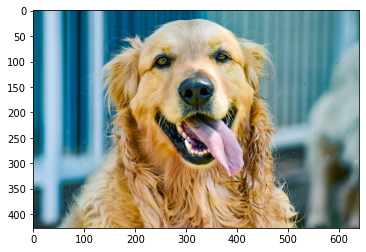

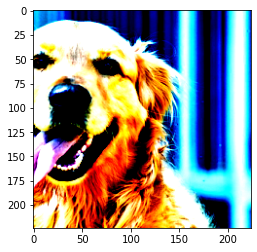

In [ ]:
#訓練時の画像の前処理の動作を確認
#実行するたびに処理結果の画像が変わる

#画像の読み込み
img_file_path = "/content/data/goldenretriever-3724972_640.jpg"
img = Image.open(img_file_path)

plt.imshow(img)
plt.show()

#前処理
size = 224
mean = (0.485, 0.456, 0.406)
std = (0.229, 0.224, 0.225)

transform = ImageTransform(size, mean, std)
img_transformed = transform(img, phase='train')

#表示
img_transformed = img_transformed.numpy().transpose(1, 2, 0)
img_transformed = np.clip(img_transformed, 0, 1)
plt.imshow(img_transformed)
plt.show()

In [ ]:
#画像へのファイルパスのリストを作成する
def make_datapath_list(phase='train'):
    """
    データのパスを格納したリストを作成する。
    Parameters
    --------------------------
    phase: 'train' or 'val'
        訓練データか検証データかを指定する
    Returns
    --------------------------
    path_list: list
        データへのパスを格納したリスト
    """
    rootpath = "/content/data/hymenoptera_data"
    target_path = osp.join(rootpath+"/"+phase+"/**/*.jpg")
    print(target_path)

    path_list = []
    for path in glob.glob(target_path):
        path_list.append(path)
    return path_list

#実行
train_list = make_datapath_list(phase='train')
val_list = make_datapath_list(phase='val')

train_list

/content/data/hymenoptera_data/train/**/*.jpg
/content/data/hymenoptera_data/val/**/*.jpg


['/content/data/hymenoptera_data/train/bees/537309131_532bfa59ea.jpg',
 '/content/data/hymenoptera_data/train/bees/2321139806_d73d899e66.jpg',
 '/content/data/hymenoptera_data/train/bees/760568592_45a52c847f.jpg',
 '/content/data/hymenoptera_data/train/bees/2710368626_cb42882dc8.jpg',
 '/content/data/hymenoptera_data/train/bees/3090975720_71f12e6de4.jpg',
 '/content/data/hymenoptera_data/train/bees/2634617358_f32fd16bea.jpg',
 '/content/data/hymenoptera_data/train/bees/196430254_46bd129ae7.jpg',
 '/content/data/hymenoptera_data/train/bees/2908916142_a7ac8b57a8.jpg',
 '/content/data/hymenoptera_data/train/bees/2493379287_4100e1dacc.jpg',
 '/content/data/hymenoptera_data/train/bees/2477349551_e75c97cf4d.jpg',
 '/content/data/hymenoptera_data/train/bees/2765347790_da6cf6cb40.jpg',
 '/content/data/hymenoptera_data/train/bees/2358061370_9daabbd9ac.jpg',
 '/content/data/hymenoptera_data/train/bees/444532809_9e931e2279.jpg',
 '/content/data/hymenoptera_data/train/bees/2959730355_416a18c63c.jp

In [ ]:
#Datasetを作成
class HymenopteraDataset(data.Dataset):
    """
    Datasetのクラス。PyTorchのデータセットクラスを継承。
    Attributes
    --------------------------
    file_list: list
        画像のパスを格納したリスト
    transform: object
        前処理クラスのインスタンス
    phase: 'train' or 'val'
        訓練か検証かを指定
    """
    def __init__(self, file_list, transform=None, phase='train'):
        self.file_list = file_list
        self.transform = transform
        self.phase = phase
    
    def __len__(self):
        """画像の枚数を返す"""
        return len(self.file_list)
    
    def __getitem__(self, index):
        """前処理した画像のTensor形式のデータとラベルを取得"""
        #index版目の画像をロード
        img_path = self.file_list[index]
        img = Image.open(img_path)

        #画像の前処理を実行
        img_transformed = self.transform(img, self.phase)

        # 画像のラベルをファイル名から抜き出す
        if self.phase == "train":
            label = img_path.split("/")[-2]
        elif self.phase == "val":
            label = img_path.split("/")[-2]

        # ラベルを数値に変更する
        if label == "ants":
            label = 0
        elif label == "bees":
            label = 1

        return img_transformed, label

size = 224
mean = (0.485, 0.456, 0.406)
std = (0.229, 0.224, 0.225)

#実行
train_dataset = HymenopteraDataset(file_list=train_list, transform=ImageTransform(size, mean, std), phase='train')
val_dataset = HymenopteraDataset(file_list=val_list, transform=ImageTransform(size, mean, std), phase='val')
#動作確認
index = 0
print(train_dataset.__getitem__(index)[0].size())
print(train_dataset.__getitem__(index)[1])

torch.Size([3, 224, 224])
1


### DataLoader

In [ ]:
batch_size = 32
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dataloader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

dataloaders_dict = {"train": train_dataloader, "val": val_dataloader}

#動作確認
batch_iterator = iter(dataloaders_dict["train"])
inputs, labels = next(batch_iterator)
print(inputs.size())
print(labels)

torch.Size([32, 3, 224, 224])
tensor([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
        0, 1, 1, 0, 0, 0, 0, 1])


### model

In [ ]:
#学習済VGG16をロード
use_pretrained = True
net = models.vgg16(pretrained=use_pretrained)

#VGG16の最後の出力層の出力ユニットを2クラスに付け替え
net.classifier[6] = nn.Linear(in_features=4096, out_features=2)

#訓練モードに設定
net.train()
print('ネットワーク設定完了：学習済みの重みをロードし、訓練モードに設定しました')

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ネットワーク設定完了：学習済みの重みをロードし、訓練モードに設定しました


###損失関数を定義

In [ ]:
criterion = nn.CrossEntropyLoss()

### 最適化手法を設定

In [ ]:
#転移学習で学習させるパラメータを格納しておく
params_to_update = []
#学習させるパラメータ名
update_param_names = ["classifier.6.weight", "classifier.6.bias"]

#学習させるパラメータ以外は勾配計算をなくし、変化しないように設定
for name, param in net.named_parameters():
    if name in update_param_names:
        param.requires_grad = True
        params_to_update.append(param)
        print(name)
    else:
        param.requires_grad = False

# params_to_updateの中身を確認
print("-----------")
print(params_to_update)

classifier.6.weight
classifier.6.bias
-----------
[Parameter containing:
tensor([[ 0.0081,  0.0060, -0.0027,  ...,  0.0153, -0.0107, -0.0127],
        [ 0.0023,  0.0124, -0.0089,  ...,  0.0089,  0.0061, -0.0122]],
       requires_grad=True), Parameter containing:
tensor([0.0111, 0.0065], requires_grad=True)]


In [ ]:
optimizer = optim.SGD(params=params_to_update, lr=0.001, momentum=0.9)

###学習と検証

In [ ]:
#モデルを学習させる関数
def train_model(net, dataloaders_dict, criterion, optimizer, num_epochs):
    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch+1, num_epochs))
        print('-------------')
        #epochごとに学習と検証をループ
        for phase in ['train', 'val']:
            if phase=='train':
                net.train()
            else:
                net.eval()
            
            epoch_loss = 0.0
            epoch_corrects = 0
            #未学習時の検証性能を確かめるため、epoch=0の学習は省略
            if epoch==0 and phase=='train':
                continue
            
            #dataloaderからミニバッチを取り出すループ
            for inputs, labels in tqdm(dataloaders_dict[phase]):
                #optimizerを初期化
                optimizer.zero_grad()
                #forward
                with torch.set_grad_enabled(phase=='train'):
                    outputs = net(inputs)
                    loss = criterion(outputs, labels)
                    _, preds = torch.max(outputs, 1)#ラベルを予測

                    #学習時はbackwardで勾配計算、パラメータの更新
                    if phase=='train':
                        loss.backward()
                        optimizer.step()
                    
                    #lossの合計を更新
                    epoch_loss += loss.item()*inputs.size(0)
                    #正解数の合計を更新
                    epoch_corrects += torch.sum(preds==labels.data)
            
            #epochごとのlossと正解率を表示
            epoch_loss = epoch_loss / len(dataloaders_dict[phase].dataset)
            epoch_acc = epoch_corrects.double() / len(dataloaders_dict[phase].dataset)
            print('{} Loss: {:.4f} Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc))

In [ ]:
num_epochs = 2
train_model(net, dataloaders_dict, criterion, optimizer, num_epochs)

Epoch 1/2
-------------


100%|██████████| 5/5 [01:04<00:00, 12.91s/it]


val Loss: 0.7058 Acc: 0.5621
Epoch 2/2
-------------


100%|██████████| 8/8 [01:41<00:00, 12.70s/it]


train Loss: 0.4489 Acc: 0.7531


100%|██████████| 5/5 [01:01<00:00, 12.34s/it]

val Loss: 0.1708 Acc: 0.9477
